In [0]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from cleaning import *
from data_loader import *
from extractNet_connected_vgg11 import *
from helper import *
from metrics import *
from trainer import *
from visualizer import *

In [2]:
!rm -rf __MACOSX
!rm -rf *.zip
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/data_vehicle.zip
!unzip data_vehicle.zip
!rm -rf __MACOSX
!rm -rf *.zip

--2019-03-22 06:16:05--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/data_vehicle.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/data_vehicle.zip [following]
--2019-03-22 06:16:06--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/data_vehicle.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3334722 (3.2M) [application/zip]
Saving to: ‘data_vehicle.zip’

data_vehicle.zip    100%[===================>]   3.18M  --.-KB/s    in 0.09s   

2019-03-22 06:16:08 (34.3 MB/s) - ‘data_vehicle.zip’ saved 

In [0]:
# Set random seeds
torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/content/data", transform)

# Dataset sizes
size = len(dataset)

train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

batch_size = 64

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader
train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=1)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=1)

In [0]:
# Train model
net = extractNet_connected_vgg11()
trainModel(net, train, valid, batch_size=batch_size, num_epochs=50, checkpoint=True)

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to /root/.torch/models/vgg11-bbd30ac9.pth
531456000it [00:05, 90085845.17it/s]


Epoch:0, Train IoU:0.3494, Train Loss:0.0149|Valid IoU:0.3425, Valid Loss:0.0152
Epoch:1, Train IoU:0.4448, Train Loss:0.0146|Valid IoU:0.4263, Valid Loss:0.0150
Epoch:2, Train IoU:0.4506, Train Loss:0.0141|Valid IoU:0.4216, Valid Loss:0.0146
Epoch:3, Train IoU:0.5338, Train Loss:0.0137|Valid IoU:0.4966, Valid Loss:0.0143
Epoch:4, Train IoU:0.5170, Train Loss:0.0138|Valid IoU:0.4794, Valid Loss:0.0142
Epoch:5, Train IoU:0.5577, Train Loss:0.0135|Valid IoU:0.5162, Valid Loss:0.0141
Epoch:6, Train IoU:0.5449, Train Loss:0.0135|Valid IoU:0.4963, Valid Loss:0.0140
Epoch:7, Train IoU:0.5883, Train Loss:0.0133|Valid IoU:0.5338, Valid Loss:0.0139
Epoch:8, Train IoU:0.5897, Train Loss:0.0129|Valid IoU:0.5270, Valid Loss:0.0137
Epoch:9, Train IoU:0.6363, Train Loss:0.0128|Valid IoU:0.5695, Valid Loss:0.0135
Epoch:10, Train IoU:0.6543, Train Loss:0.0124|Valid IoU:0.5761, Valid Loss:0.0132
Epoch:11, Train IoU:0.7058, Train Loss:0.0121|Valid IoU:0.6151, Valid Loss:0.0129
Epoch:12, Train IoU:0.7398

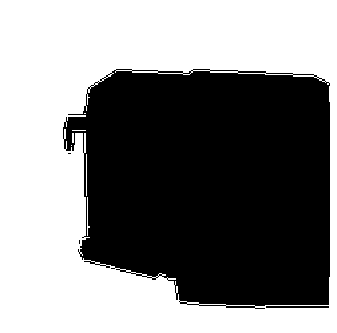

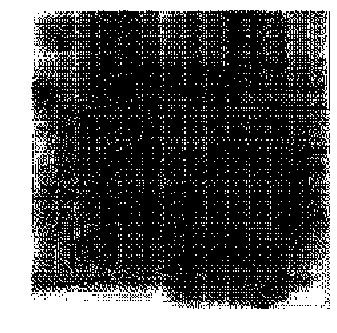

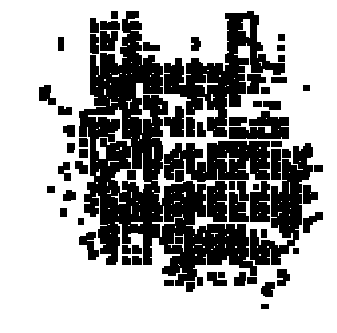

<Figure size 576x396 with 0 Axes>

In [13]:
# After training (train set)
img, target = train_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(target)
imshow(out)
imshow(denoised)

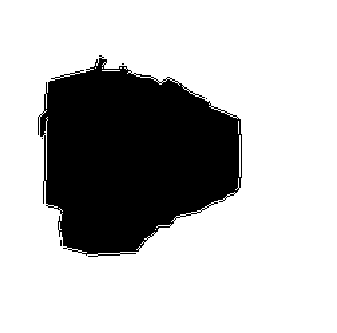

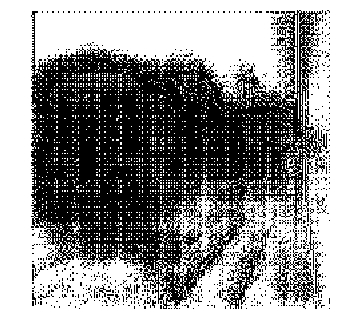

<Figure size 576x396 with 0 Axes>

In [7]:
# After training (validation set)
img, target = valid_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(target)
imshow(out)
imshow(denoised)